<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week3-visualization/Week3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import pandas as pd
import matplotlib.pyplot as plt # for plotting

url = "https://raw.githubusercontent.com/dmnarula/football-ds-learning/refs/heads/main/sample_data/pl_24_25_small.csv"
df = pd.read_csv(url)

df.head()

,name,club,position,minutes,goals,assists,xG,xA
0,Bukayo Saka,Arsenal,FWD,2850,16,10,15.2,9.5
1,Martin Odegaard,Arsenal,MID,2900,11,9,10.8,8.7
2,Gabriel Jesus,Arsenal,FWD,2100,9,6,11.4,5.2
3,Declan Rice,Arsenal,MID,3200,6,5,5.3,6.1
4,Leandro Trossard,Arsenal,FWD,1950,10,4,9.1,3.6


In [3]:
df = df.rename(columns={
    "minutes": "mins",
    "goals": "G",
    "assists": "A"
}
)

df["GI"] = df["G"] + df["A"]
df["GI_per_90"] = (df["GI"] / (df["mins"]/90)).round(2)

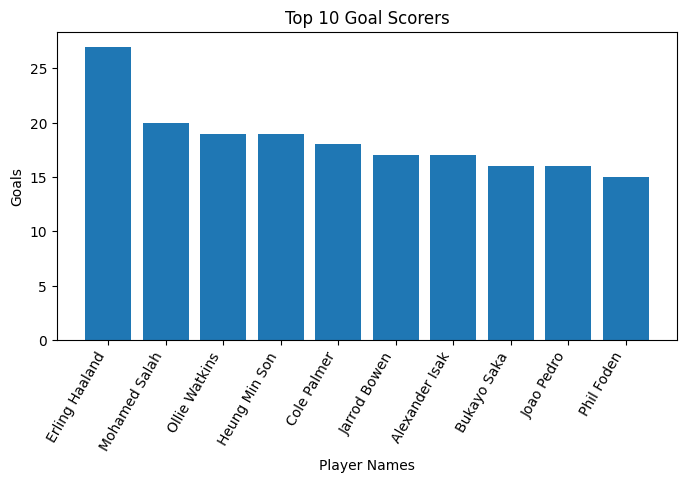

In [4]:
top_players = df.sort_values(by="G", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_players["name"], top_players["G"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Goals")
plt.xlabel("Player Names")
plt.title("Top 10 Goal Scorers")
plt.show()

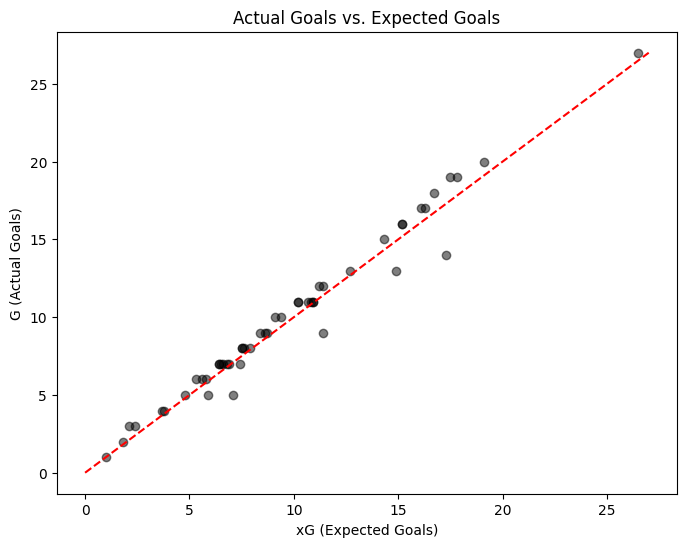

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(df["xG"], df["G"], color="black", alpha=0.5)
plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Actual Goals vs. Expected Goals")

max_val = max(df["xG"].max(), df["G"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")


plt.show()

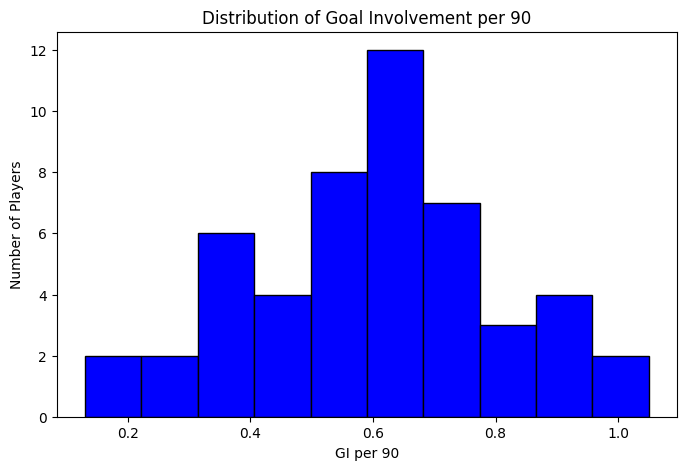

In [6]:
plt.figure(figsize=(8,5)),

plt.hist(df["GI_per_90"], bins=10, edgecolor="black", color="blue")

plt.xlabel("GI per 90")
plt.ylabel("Number of Players")
plt.title("Distribution of Goal Involvement per 90")

plt.show()

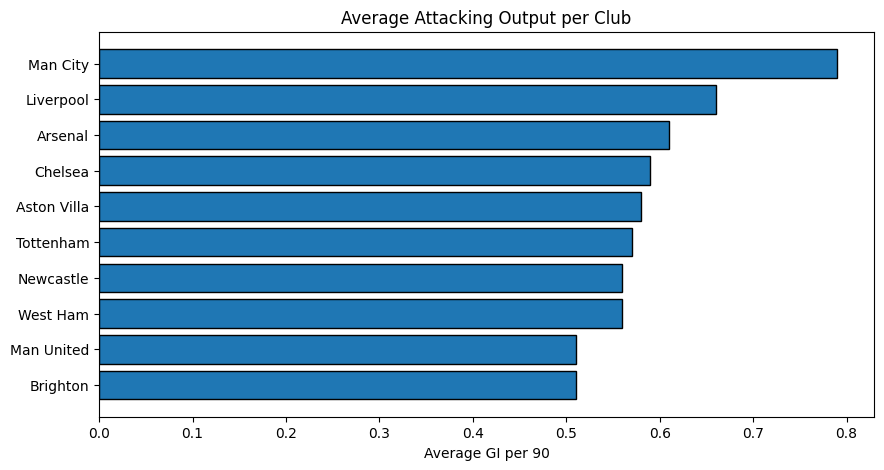

In [21]:
club_avg = df.groupby("club")["GI_per_90"].mean().sort_values().round(2)
#club_avg.head()

plt.figure(figsize=(10,5))
plt.barh(club_avg.index, club_avg.values, edgecolor="black")

plt.xlabel("Average GI per 90")
plt.title("Average Attacking Output per Club")
plt.show()

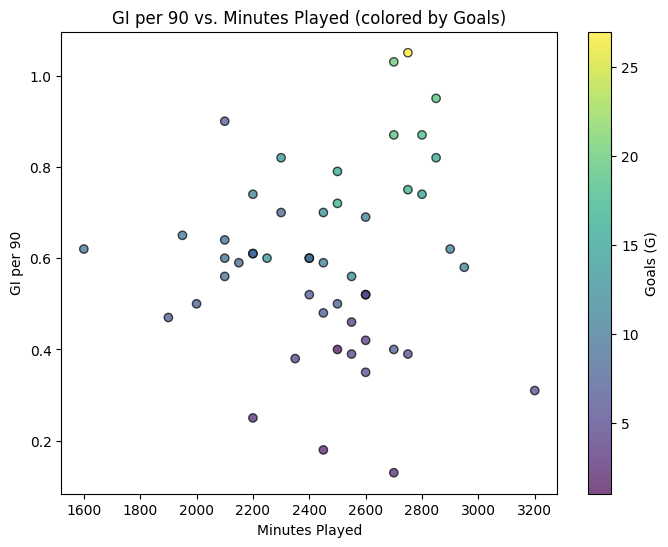

In [8]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df["mins"],
    df["GI_per_90"],
    c=df["G"],
    cmap="viridis",
    alpha=0.7,
    edgecolor="black"
)

plt.colorbar(scatter, label="Goals (G)")

plt.xlabel("Minutes Played")
plt.ylabel("GI per 90")
plt.title("GI per 90 vs. Minutes Played (colored by Goals)")

plt.show()

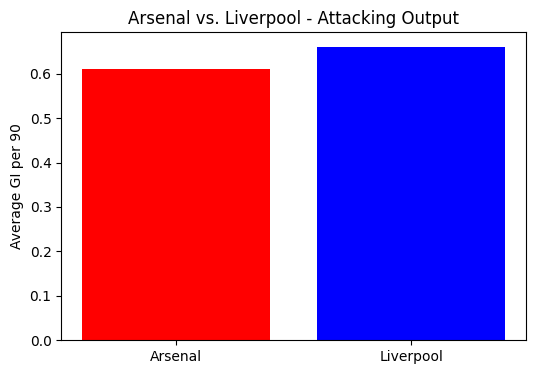

In [22]:
clubs = ["Arsenal", "Liverpool"]
subset = df[df["club"].isin(clubs)]

club_avg = subset.groupby("club")["GI_per_90"].mean().round(2)

plt.figure(figsize=(6,4))
plt.bar(club_avg.index, club_avg.values, color=["red", "blue"])

plt.ylabel("Average GI per 90")
plt.title("Arsenal vs. Liverpool - Attacking Output")

plt.show()

<Figure size 1200x600 with 0 Axes>

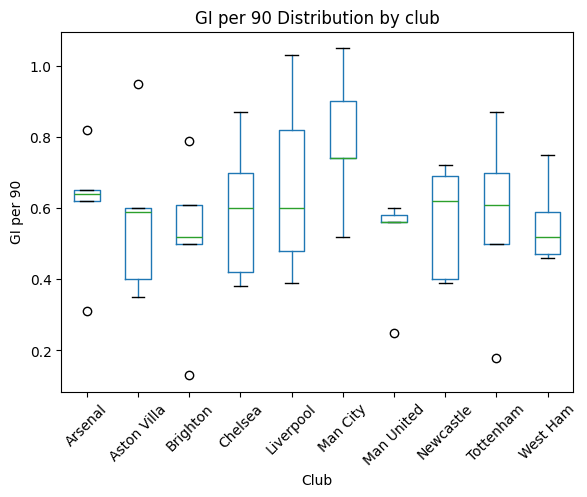

In [27]:
plt.figure(figsize=(12,6))

df.boxplot(column="GI_per_90", by="club", grid=False, rot=45)

plt.title("GI per 90 Distribution by club")
plt.suptitle("")
plt.xlabel("Club")
plt.ylabel("GI per 90")

plt.show()

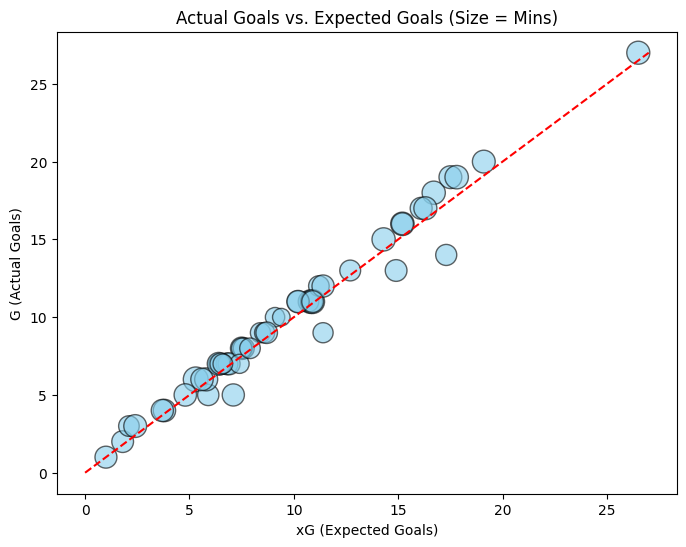

In [35]:
plt.figure(figsize=(8,6))

plt.scatter(
  df["xG"],
  df["G"],
  s=df["mins"] / 10,
  color="skyblue",
  edgecolor="black",
  alpha=0.6)



plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Actual Goals vs. Expected Goals (Size = Mins)")

max_val = max(df["xG"].max(), df["G"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")


plt.show()

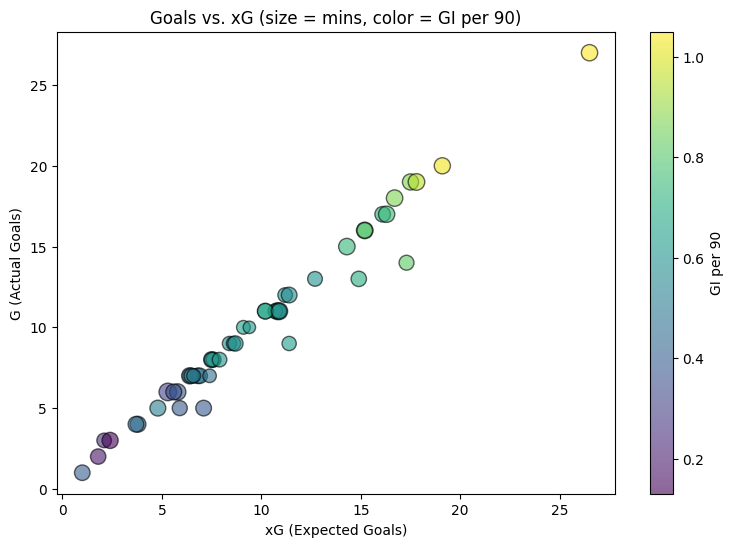

In [40]:
plt.figure(figsize=(9,6))

scatter = plt.scatter(
    df["xG"],
    df["G"],
    s=df["mins"]/20,
    c=df["GI_per_90"],
    cmap='viridis',
    alpha=0.6,
    edgecolor="black"
)

plt.colorbar(scatter, label="GI per 90"),

plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Goals vs. xG (size = mins, color = GI per 90)")

plt.show()